___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [2]:
# CODE HERE

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/Tensorflow-2-and-Keras-Deep-Learning/main/Data/Frozen_Dessert_Production.csv',
               index_col='DATE')

In [4]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Task: Change the column name to Production**

In [5]:
#CODE HERE

In [6]:
df=df.rename(columns={'IPN31152N':'Production'})

**TASK: Plot out the time series**

In [7]:
#CODE HERE

<AxesSubplot:xlabel='DATE'>

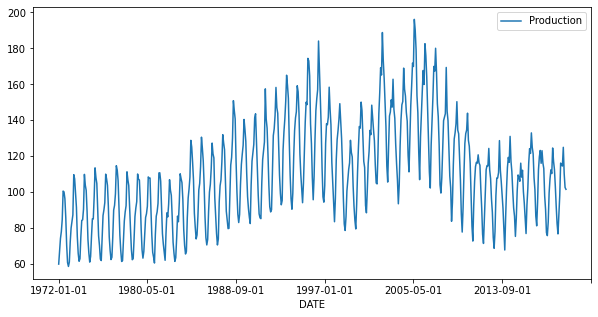

In [8]:
df.plot(figsize=(10,5))

## Train Test Split

**TASK: Figure out the length of the data set**

In [9]:
#CODE HERE

In [10]:
len(df)

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [11]:
#CODE HERE

In [12]:
train=df[:-48]
test=df[-48:]

In [13]:
len(test)

48

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [14]:
# CODE HERE

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler()

In [17]:
train_scaled=scaler.fit_transform(train)
test_scaled=scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [18]:
#CODE HERE

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
length=24
batch_size=1
generator =TimeseriesGenerator(train_scaled,train_scaled,length=length,batch_size=batch_size)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [30]:
n_features=1

In [31]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features),return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24, 100)           40800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                12600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 53,426
Trainable params: 53,426
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [33]:
# CODE HERE

In [34]:
length=24
batch_size=1
test_generator =TimeseriesGenerator(test_scaled,test_scaled,length=length,batch_size=batch_size)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [35]:
#CODE HERE

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stoping = EarlyStopping(monitor="val_loss",patience=2)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [38]:
# CODE HERE
model.fit(generator,validation_data=test_generator,callbacks=[early_stoping],verbose=1,epochs=20)

Epoch 1/20
501/501 [==============================] - 198s 391ms/step - loss: 0.0346 - val_loss: 0.0162
Epoch 2/20
501/501 [==============================] - 224s 448ms/step - loss: 0.0219 - val_loss: 0.0110
Epoch 3/20
501/501 [==============================] - 227s 453ms/step - loss: 0.0085 - val_loss: 0.0081
Epoch 4/20
501/501 [==============================] - 234s 467ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 5/20
501/501 [==============================] - 241s 482ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 6/20
501/501 [==============================] - 240s 479ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 7/20
501/501 [==============================] - 247s 493ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 8/20
501/501 [==============================] - 238s 476ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 9/20
501/501 [==============================] - 243s 485ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 10/20
501/501 [==============================] - 246s 492m

**TASK: Plot the history of the loss that occured during training.**

<AxesSubplot:>

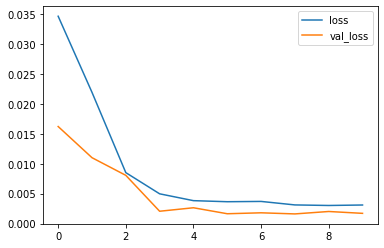

In [39]:
# CODE HERE
pd.DataFrame(model.history.history).plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [40]:
# CODE HERE
len(test)

48

In [41]:
len(train_scaled)

525

In [42]:
train_scaled

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

In [43]:
generator[-len(test)]

(array([[[0.23591506],
         [0.12980579],
         [0.09307932],
         [0.19444507],
         [0.29743684],
         [0.39142952],
         [0.40833181],
         [0.40654945],
         [0.47764626],
         [0.39026746],
         [0.35620545],
         [0.27422828],
         [0.2198076 ],
         [0.11764411],
         [0.07351475],
         [0.14149624],
         [0.2863296 ],
         [0.35795581],
         [0.35814561],
         [0.37998486],
         [0.50926561],
         [0.39057433],
         [0.34465461],
         [0.28747203]]]),
 array([[0.23516459]]))

In [46]:
length

24

In [47]:
initial_scaler=train_scaled[-length:]
initial_scaler

array([[0.23516459],
       [0.15569044],
       [0.06649001],
       [0.20170834],
       [0.31321197],
       [0.40080166],
       [0.44136265],
       [0.42156466],
       [0.52634606],
       [0.42622818],
       [0.38365722],
       [0.30511534],
       [0.23707931],
       [0.20297948],
       [0.12155208],
       [0.19574094],
       [0.30468338],
       [0.37028329],
       [0.36143183],
       [0.34467716],
       [0.41797884],
       [0.36154745],
       [0.38938173],
       [0.30315844]])

In [48]:
# new_scaler=np.append(initial_scaler,y)[1:].reshape(1,24,1)

In [49]:
predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [50]:
predictions

[array([0.17470902], dtype=float32),
 array([0.11730234], dtype=float32),
 array([0.11332422], dtype=float32),
 array([0.1653102], dtype=float32),
 array([0.23162964], dtype=float32),
 array([0.2975197], dtype=float32),
 array([0.351249], dtype=float32),
 array([0.37670884], dtype=float32),
 array([0.37929118], dtype=float32),
 array([0.3397285], dtype=float32),
 array([0.27393118], dtype=float32),
 array([0.18799606], dtype=float32),
 array([0.10839072], dtype=float32),
 array([0.05447396], dtype=float32),
 array([0.05508951], dtype=float32),
 array([0.10578797], dtype=float32),
 array([0.18233511], dtype=float32),
 array([0.2614738], dtype=float32),
 array([0.3192486], dtype=float32),
 array([0.34348366], dtype=float32),
 array([0.34214962], dtype=float32),
 array([0.3045439], dtype=float32),
 array([0.2408565], dtype=float32),
 array([0.15379965], dtype=float32),
 array([0.0734726], dtype=float32),
 array([0.02297073], dtype=float32),
 array([0.0300778], dtype=float32),
 array([0.09

In [51]:
predictions=scaler.inverse_transform(predictions)

In [52]:
predictions

array([[ 82.68471899],
       [ 74.79050167],
       [ 74.24345511],
       [ 81.39225087],
       [ 90.51209513],
       [ 99.57289615],
       [106.96142115],
       [110.46250112],
       [110.81760896],
       [105.37719158],
       [ 96.32914427],
       [ 84.51187135],
       [ 73.56503045],
       [ 66.15072603],
       [ 66.23537299],
       [ 73.20711635],
       [ 83.73341188],
       [ 94.61608263],
       [102.56091825],
       [105.89357721],
       [105.71012798],
       [100.53882112],
       [ 91.78091645],
       [ 79.80939011],
       [ 68.76330434],
       [ 61.81859447],
       [ 62.79591509],
       [ 71.4375913 ],
       [ 82.46924616],
       [ 93.38855922],
       [101.09106629],
       [105.04176756],
       [104.41401653],
       [ 99.16023681],
       [ 89.83417353],
       [ 78.1363928 ],
       [ 67.31456545],
       [ 60.44834636],
       [ 61.65811789],
       [ 70.37911182],
       [ 81.44449515],
       [ 92.28925724],
       [100.14203014],
       [104

In [53]:
test['predictions']=predictions

C:\Users\asus\AppData\Local\Temp/ipykernel_15256/3764566312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=predictions


In [54]:
test

,Production,predictions
DATE,,
2015-10-01,93.9317,82.684719
2015-11-01,85.8640,74.790502
2015-12-01,76.9749,74.243455
2016-01-01,92.8105,81.392251
2016-02-01,101.9743,90.512095
2016-03-01,116.1793,99.572896
2016-04-01,124.2106,106.961421
2016-05-01,121.5435,110.462501
2016-06-01,132.9865,110.817609


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

<AxesSubplot:xlabel='DATE'>

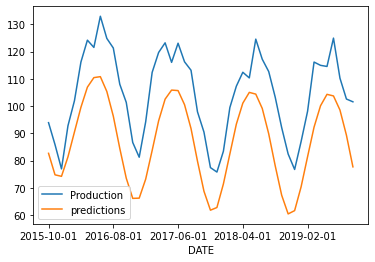

In [55]:
# CODE HEREtest
test.plot()

**TASK: Calculate your RMSE.**

In [ ]:
#CODE HERE

In [57]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['Production'],test['predictions']))

18.319327181158684